In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)

In [3]:
dados.head(3)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [50]:
dados['sexo_est_civil'].unique()

array([1, 2, 3, 4])

In [4]:
linhas = dados.shape[0]
colunas= dados.shape[1]
duplicados = (dados.duplicated()).sum()
nulos = (dados.isnull()).sum()

In [5]:
print('A base de dados tem {} Linhas e {} Colunas.'.format(linhas, colunas))
print('A base de dados tem {} dados duplicados'.format(duplicados))
print('Dados nulos:\n\n{}'.format(nulos))

A base de dados tem 1000 Linhas e 21 Colunas.
A base de dados tem 0 dados duplicados
Dados nulos:

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64


## Incluindo dados numericos nas colunas tipo str

In [6]:
 dados.select_dtypes(exclude='number')

,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,sexo_est_civil,outros_fiadores,propriedade,outros_planos_financiamento,tipo_residencia,status_emprego,telefone,trabalhador_estrangeiro
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,real estate,none,own,unskilled - resident,none,yes
996,< 0 DM,existing credits paid back duly till now,car (used),... < 100 DM,1 <= ... < 4 years,male : divorced/separated,none,if not A121 : building society savings agreeme...,none,own,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes
997,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,.. >= 7 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,own,skilled employee / official,none,yes
998,< 0 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,"yes, registered under the customers name",yes


In [7]:
corrigir = dados.select_dtypes(exclude='number')
a = {}

for col in corrigir:
    i = 1
    for item in corrigir[col].unique():
        a.update({item: i})
        i += 1
    corrigir[col] =corrigir[col].map(a)
    dados[col] = corrigir[col]   

In [8]:
dados.head()
dados['sexo_est_civil'].unique()

array([1, 2, 3, 4])

## Separando dados em variáveis dependente e independentes:

In [9]:
y = dados.default
x = dados.drop(columns='default')

In [10]:
x.head(3)

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1


In [11]:
y.head(3)

0    0
1    1
2    0
Name: default, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.30, random_state=SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de teste de treino tem {} elementos e a base de teste tem {} elementos.'.format(base_treino,
                                                                                              base_teste))

A base de teste de treino tem 700 elementos e a base de teste tem 300 elementos.


## Criando e rodando modelo:

In [13]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)

In [14]:
  modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

## Acuracia de treino

In [15]:
print(modelo.score(treino_x, treino_y))

0.7585714285714286


In [16]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

## Acuracia de teste

In [17]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(teste_y, previsoes)
acuracia

0.76

## Matriz de confusão

<img src='data/matriz_confusao.jpg' width="300" height="300">

/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


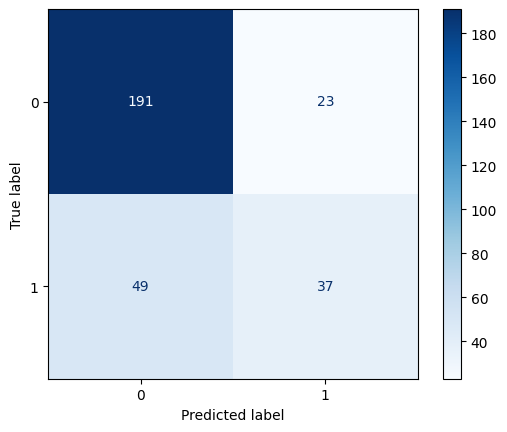

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 

matriz_confusao = plot_confusion_matrix (modelo, teste_x, teste_y, cmap ='Blues', values_format='.3g')
matriz_confusao

In [19]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.62      0.43      0.51        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.74      0.76      0.75       300



 ## Plotando a curva ROC

roc_auc 0.7597261464898936


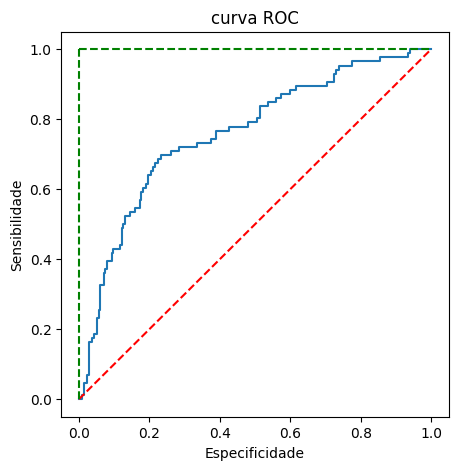

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa de falsos positivos
#tvp = taxa de falsos negativos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize = (5,5))
plt.title('curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

## Análise descritiva

In [21]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [22]:
dados.sexo_est_civil.value_counts()

#310 mulheres 690 homens

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [23]:
dados.default.value_counts()

# base de dados eh desbalanceada (70% negadas 30% deferidos)

0    700
1    300
Name: default, dtype: int64

## Histogramas

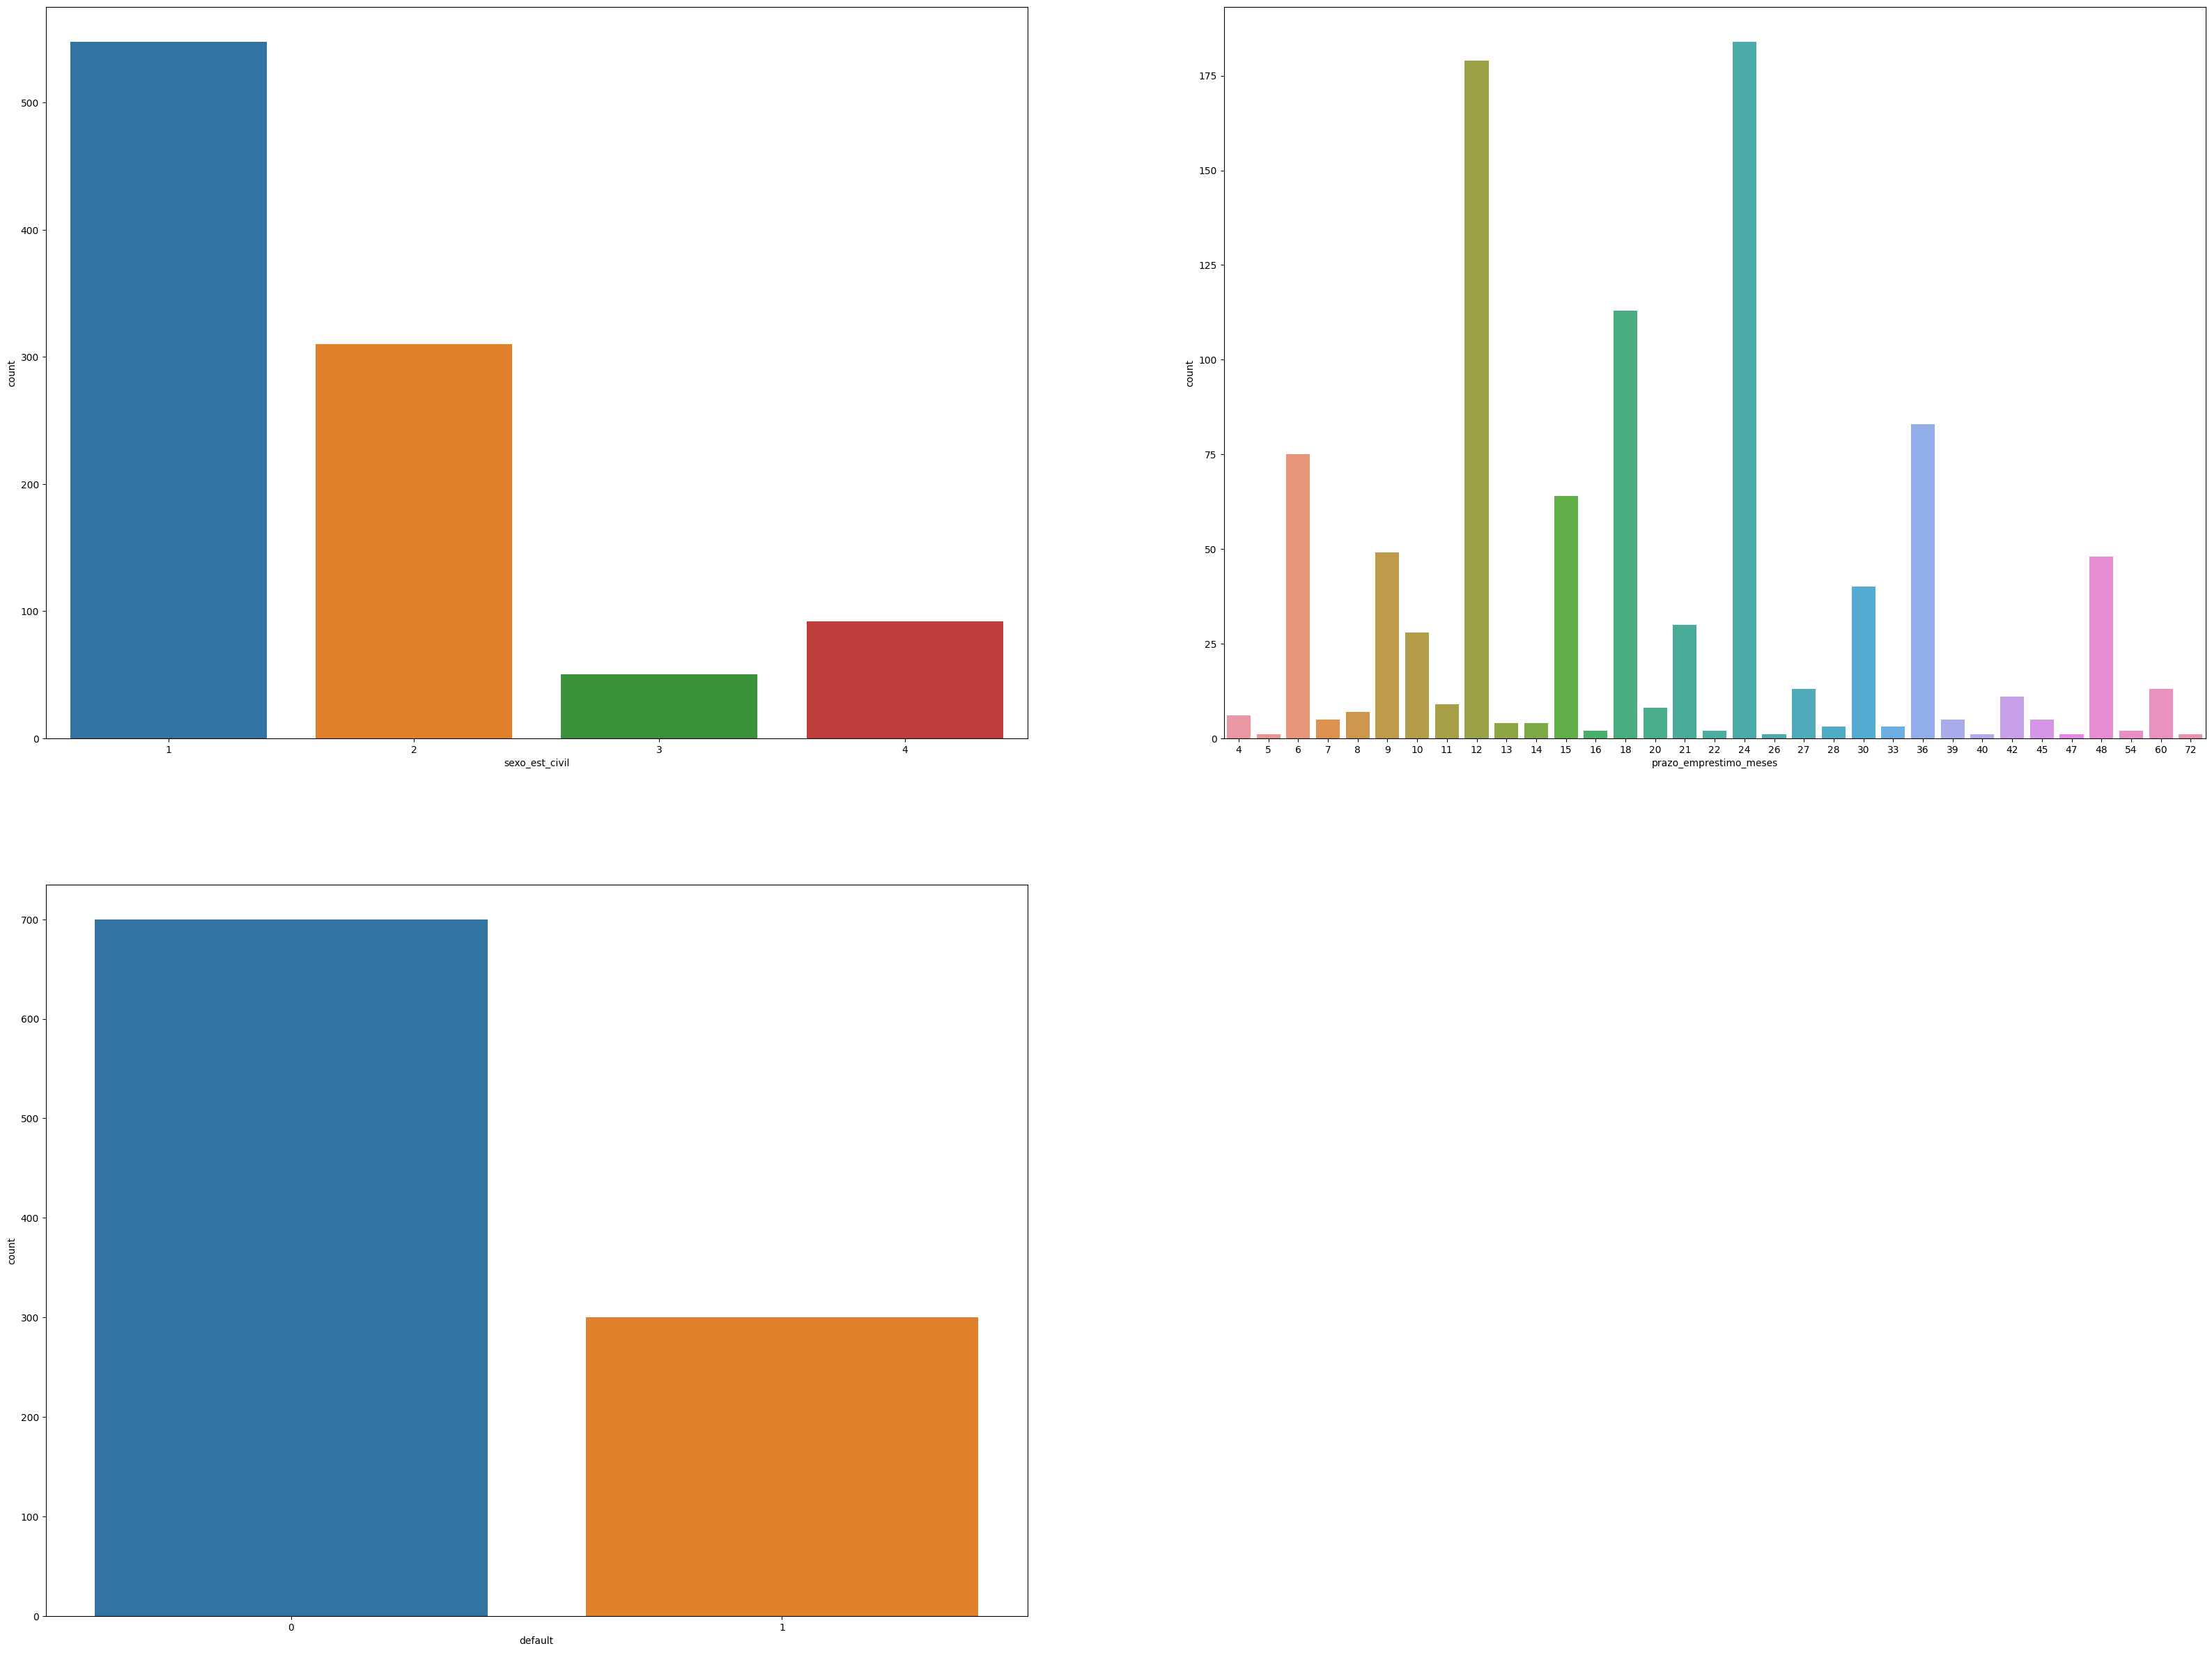

In [24]:
import seaborn as sns

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize=(40,30))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x=i[1], data = dados)

## Boxplot e gráfico de barras

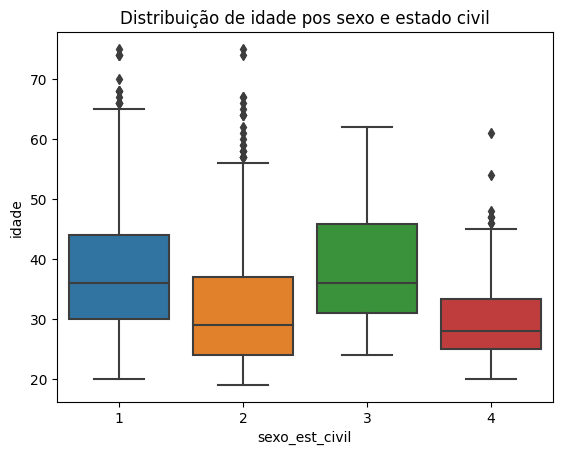

<Figure size 4000x3000 with 0 Axes>

In [25]:
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distribuição de idade pos sexo e estado civil')
plt.figure(figsize=(40,30))
plt.show()

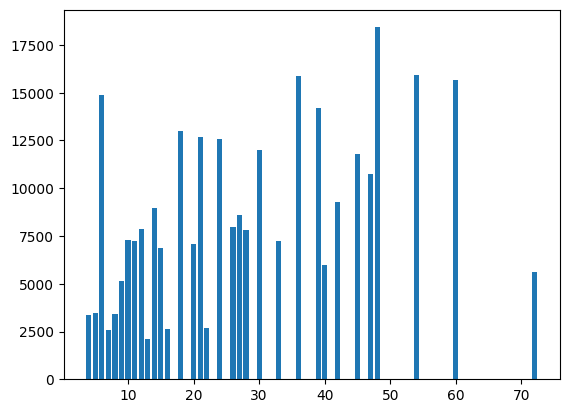

<Figure size 4000x3000 with 0 Axes>

In [26]:
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)

plt.xlabel=('prazo_emprestimo_meses')
plt.ylabel=('valor_emprestimo')
plt.title=('prazo_emprestimo_meses X valor_emprestimo')
plt.figure(figsize=(40,30))
plt.show()


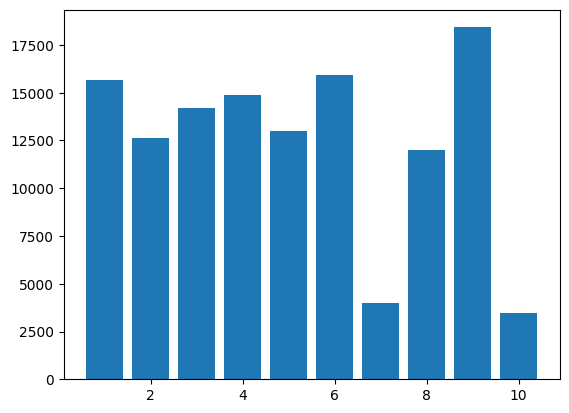

<Figure size 4000x3000 with 0 Axes>

In [27]:
plt.bar(dados.proposito_emprestimo, dados.valor_emprestimo)

plt.xlabel=('proposito_emprestimo')
plt.ylabel=('valor_emprestimo')
plt.title=('proposito_emprestimo X valor_emprestimo')
plt.figure(figsize=(40,30))
plt.show()

In [28]:
#categorias da variavel 'sexo_est_civil'

#male :   single = 1
#female:  divorced/separated/married = 2
#male :   divorced/separated = 3
#male :   married/widowed = 4


#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:0, 1:1, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,1
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,1
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,1
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,1


## Funções

In [48]:
colunas_retiradas = ['sexo', 'sexo_est_civil']
base_dados = dados.drop(columns = colunas_retiradas)
base_dados.head(2)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,1,67,1,1,2,1,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,1,...,1,22,1,1,1,1,1,2,1,0


In [45]:
# funcao 'roda_modelo' : ajuste e validação

def roda_modelo(base_dados, classificador):
    
# separando a base de modelagem e variavel resposta
    y = dados.default
    x = dados.drop(columns='default')
    
# Separando a base de treino e teste
    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.30, random_state=SEED)
    
    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    
    print(100*'-')
    print('A base de teste de treino tem {} elementos e a base de teste tem {} elementos.'.format(base_treino,
                                                                                              base_teste))
    
# Ajustar o modelo com base no teste 

    modelo = classificador # argumeto da função - cabe um modelo genérico
    modelo.fit(treino_x, treino_y)
    
#-----------------------------------------------------------------------------------------------------------------

# matriz de confusão 
    matriz_confusao = plot_confusion_matrix (modelo, teste_x, teste_y, cmap ='Blues', values_format='.3g')
    #plt.title("Matriz de Confusão")
    plt.show()

# classification report
    previsoes = previsoes = modelo.predict(teste_x)
    
    print(100*'-')
    print('/nClassification Report: ')
    print(classification_report(teste_y, previsoes))

# curva ROC e AUC
    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
    
    #tfp = taxa de falsos positivos
    #tvp = taxa de falsos negativos
    
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc: ', roc_auc_score(teste_y, prob_previsao))
    
   # plt.subplot()
    plt.figure(figsize=(5,5))

    #plt.title('curva ROC')
    plt.plot(tfp, tvp)
    #plt.xlabel('Especificidade')
    #plt.ylabel('Sensibilidade')
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.show()
    
    return modelo, matriz_confusao

----------------------------------------------------------------------------------------------------
A base de teste de treino tem 700 elementos e a base de teste tem 300 elementos.


/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


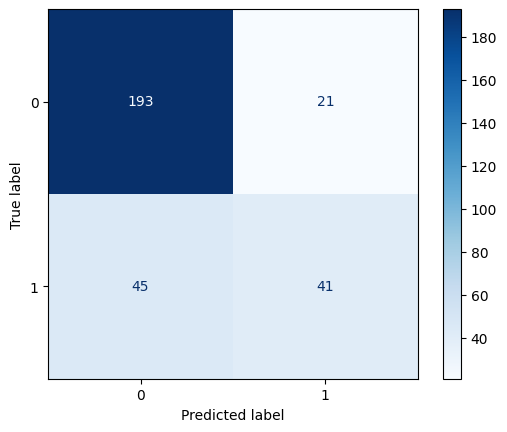

----------------------------------------------------------------------------------------------------
/nClassification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.66      0.48      0.55        86

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300

----------------------------------------------------------------------------------------------------
roc_auc:  0.7543468811128016


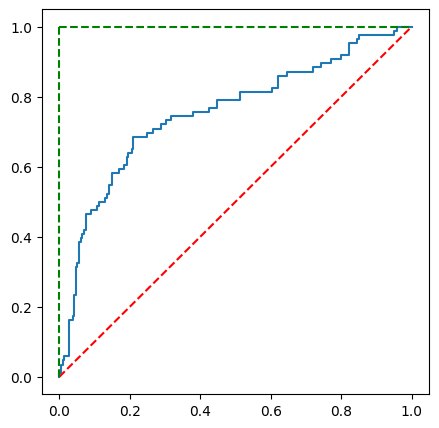

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd6d410e8e0>)

In [49]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))